In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [158]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [159]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [161]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [162]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [163]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [164]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [165]:
# df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)


In [166]:
df['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int32

In [167]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [168]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Lets divide our dataset into Dependent and Independent feture


In [169]:
X=df.drop(['FWI'],axis=1)#Independent feature
y=df['FWI']#Dependent feature


In [170]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


Let divide our dataset into train test

In [171]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [174]:
X_train.shape

(182, 11)

In [175]:
X.shape

(243, 11)

In [176]:
X_test.shape

(61, 11)

In [177]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

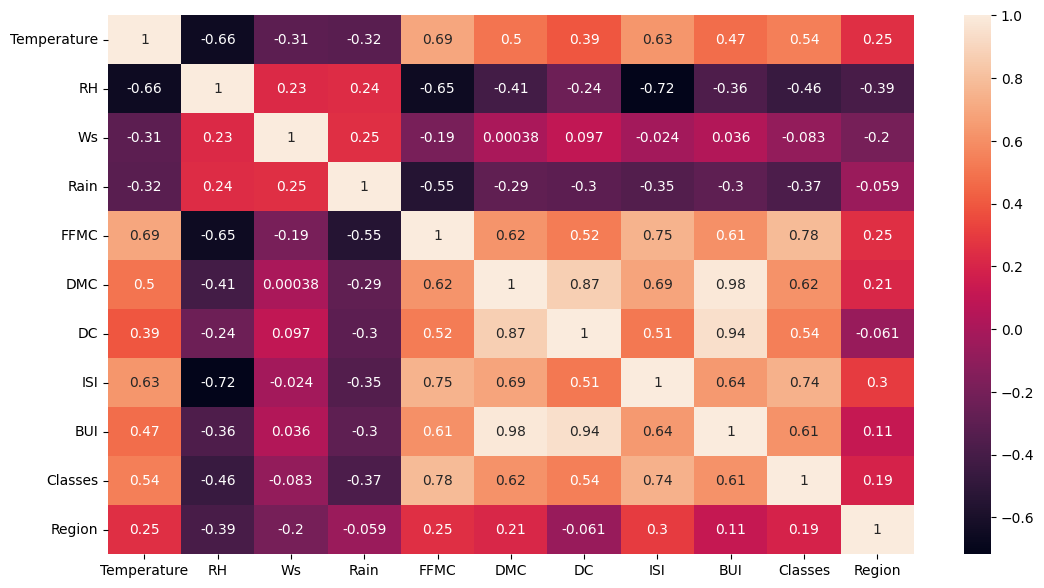

In [178]:
plt.figure(figsize=(13,7))
sns.heatmap(X_train.corr(),annot=True)

feature Selection


In [179]:
def correlation(dataset,threashold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threashold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr



In [180]:
corr_feature=correlation(X_train,0.85)

In [181]:
corr_feature

{'BUI', 'DC'}

In [182]:
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)


In [183]:
(X_train.shape),(X_test.shape)

((182, 9), (61, 9))

Feature Scaling

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
scaler=StandardScaler()

In [186]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [187]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'Boxplot after scaling')

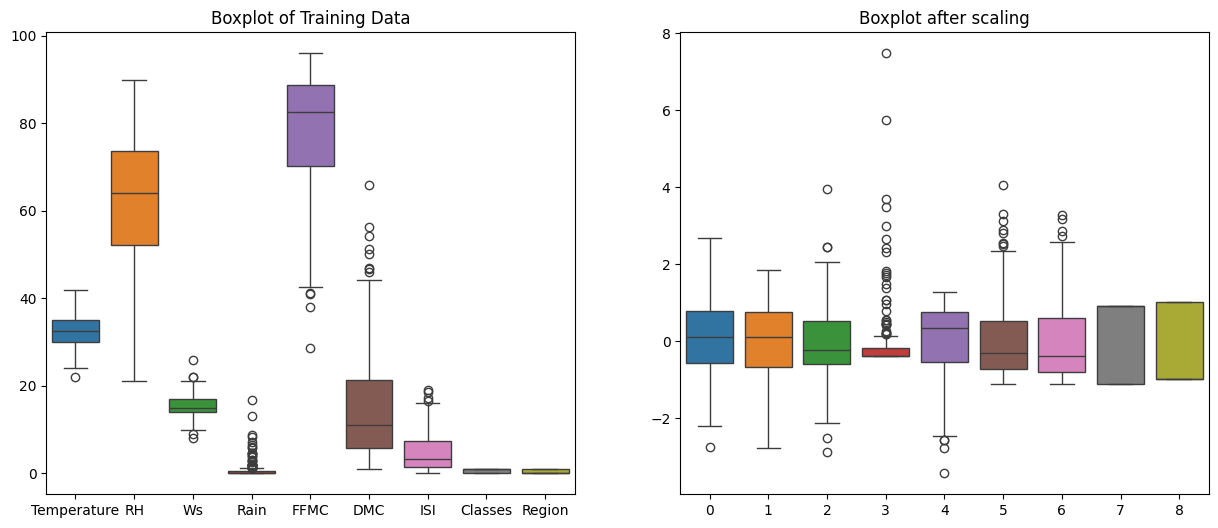

In [188]:
plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Boxplot of Training Data')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('Boxplot after scaling')



linera regreesion model

In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
regressor=LinearRegression()

In [191]:
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [192]:
regressor.intercept_

7.156043956043957

In [193]:
regressor.coef_

array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
        3.6982583 ,  4.84057298,  0.40422124, -0.39259928])

model performance matrics

In [194]:
y_pred=regressor.predict(X_test_scaled)

In [195]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [196]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [197]:
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)


mse: 0.6742766873791581
mae: 0.5468236465249972
rmse: 0.8211435242265253


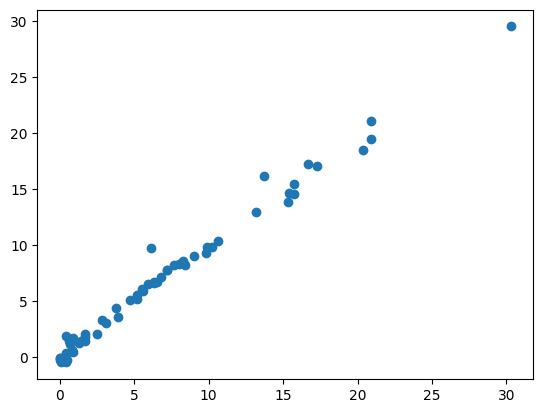

In [198]:
plt.scatter(y_test,y_pred)

accuracy of model

In [199]:
from sklearn.metrics import r2_score


In [200]:
score=r2_score(y_test,y_pred)

In [201]:
print("r2 score :",score)

r2 score : 0.9847657384266951


In [202]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred_lasso=lasso.predict(X_test_scaled)


In [203]:
mae=mean_absolute_error(y_test,y_pred_lasso)
print("Mean Absolute Error for Lasso Regression: ",mae)
score=r2_score(y_test,y_pred_lasso)
print("R2 Score for Lasso Regression: ",score)

Mean Absolute Error for Lasso Regression:  1.1331759949144087
R2 Score for Lasso Regression:  0.9492020263112388


(<matplotlib.collections.PathCollection at 0x1946124b670>,
 <matplotlib.collections.PathCollection at 0x1946124baf0>)

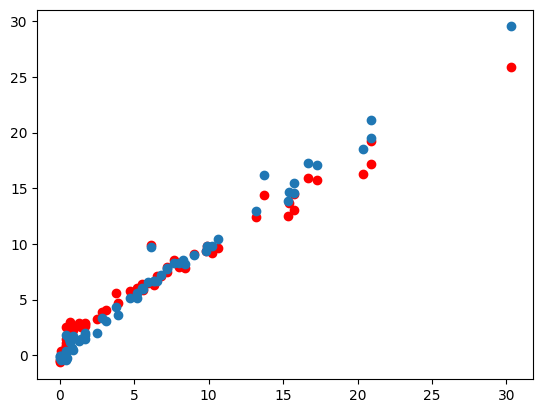

In [204]:
plt.scatter(y_test,y_pred_lasso,c='r'),plt.scatter(y_test,y_pred)

Lasso Cross validatation

In [205]:
from sklearn.linear_model import LassoCV

In [206]:
lassocv=LassoCV(cv=5)

In [207]:
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [208]:
lassocv.alpha_

0.05725391318234405

In [209]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [210]:
y_pred_cv=lassocv.predict(X_test_scaled)

In [211]:
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

In [212]:
mae=mean_absolute_error(y_test,y_pred_cv)
print("mae:",mae)
scorecv=r2_score(y_test,y_pred_cv)
print("r2_score:",scorecv)


mae: 0.6199701158263436
r2_score: 0.9820946715928275


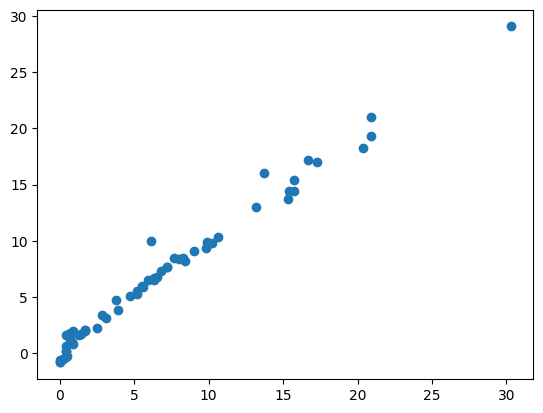

In [213]:
plt.scatter(y_test,y_pred_cv)

In [217]:
from sklearn.linear_model import Ridge

In [218]:
ridge=Ridge()

In [219]:
ridge.fit(X_train_scaled,y_train)

Ridge()

In [220]:
y_pred_ridge=ridge.predict(X_test_scaled)

In [221]:
ridge.coef_

array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
        3.68286744,  4.74488835,  0.43423672, -0.38466214])

In [222]:
ridge.intercept_

7.156043956043957

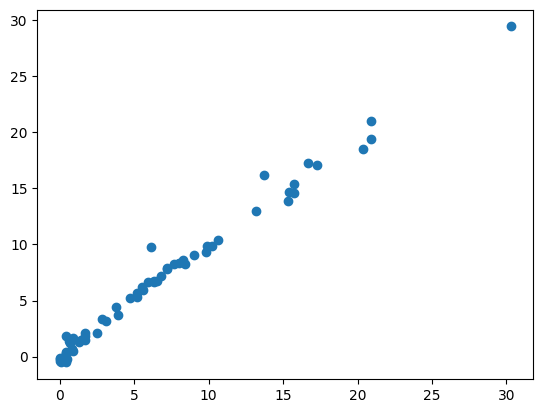

In [223]:
plt.scatter(y_test,y_pred_ridge)

In [226]:
mae=mean_absolute_error(y_test,y_pred_ridge)
print("Ridge MAE: ", mae)

Ridge MAE:  0.5642305340105708


In [228]:
score=r2_score(y_test,y_pred_ridge)
print('Ridge Regression R2 Score:',score)

Ridge Regression R2 Score: 0.9842993364555513


In [229]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridgecv=RidgeCV(cv=5)

In [231]:
ridgecv.fit(X_train_scaled,y_train)
# print(model_ridgecv.best_params_)
y_pred_ridgecv=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_ridgecv)
print("mae:",mae)
score=r2_score(y_test,y_pred_ridgecv)
print("score:",score)

mae: 0.5642305340105708
score: 0.9842993364555513


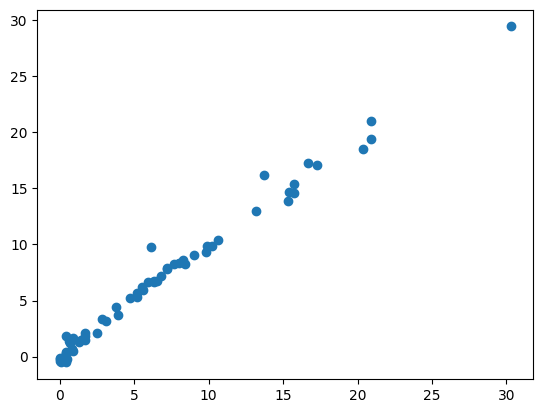

In [232]:
plt.scatter(y_test,y_pred_ridgecv)

In [233]:
from sklearn.linear_model import ElasticNet

In [234]:
elasticnet=ElasticNet()

mae: 1.8822353634896
score: 0.8753460589519703


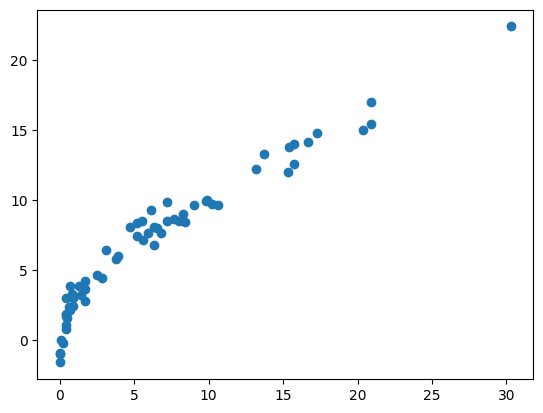

In [235]:
elasticnet.fit(X_train_scaled,y_train)
# print(model_ridgecv.best_params_)
y_pred_elasticnet=elasticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_elasticnet)
print("mae:",mae)
score=r2_score(y_test,y_pred_elasticnet)
print("score:",score)
plt.scatter(y_test,y_pred_elasticnet)

In [236]:
import pickle

In [ ]:
pickle.dump(ridge,open('ridge.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))


In [244]:
elasticnet1=pickle.load(open('elasticnet.pkl','rb'))

In [246]:
elasticnet1.fit([X_train_scaled,y_train])

TypeError: fit() missing 1 required positional argument: 'y'